In [1]:
import math
def euclidean_dist(p,q):
    p1,p2=p
    q1,q2=q
    return math.sqrt(math.pow((p1-q1),2)+math.pow((p2-q2),2))

data=[{"grape":[8,5]},{"green bean":[3,7]},{"nuts":[3,6]},{"orange":[7,3]}]
y={"grape":"fruit","green bean":"vegatable","nuts":"protien","orange":"fruit"}
new_data={"tomato":[6,4]}  

In [2]:
distances=[]
for d in data:
    for key,value in d.items():
        print(value,new_data["tomato"])
        dist=euclidean_dist(value,new_data["tomato"])
        distances.append(dist)
        print(f"{key} to tomato distance is{dist}")

[8, 5] [6, 4]
grape to tomato distance is2.23606797749979
[3, 7] [6, 4]
green bean to tomato distance is4.242640687119285
[3, 6] [6, 4]
nuts to tomato distance is3.605551275463989
[7, 3] [6, 4]
orange to tomato distance is1.4142135623730951


In [3]:
print(min(distances))

1.4142135623730951


In [4]:
k=3
t_list=[]
temp_list=distances.copy()
while k>0:
    if len(distances)<1:
        break
    min_val=min(temp_list)
    t_list.append(min_val)
    k-=1
    temp_list.remove(min_val)
print(t_list)

[1.4142135623730951, 2.23606797749979, 3.605551275463989]


In [5]:
from sklearn.neighbors import NearestNeighbors

In [6]:
import numpy as np

In [7]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [8]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)

In [9]:
distances, indices = nbrs.kneighbors(X)

In [10]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [11]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [13]:
data=pd.read_csv("wbcd.csv")

In [14]:
print(data)

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0     87139402         B        12.32         12.39           78.85   
1      8910251         B        10.60         18.95           69.28   
2       905520         B        11.04         16.83           70.92   
3       868871         B        11.28         13.39           73.00   
4      9012568         B        15.19         13.21           97.65   
..         ...       ...          ...           ...             ...   
564  911320502         B        13.17         18.22           84.28   
565     898677         B        10.26         14.71           66.20   
566     873885         M        15.28         22.41           98.92   
567     911201         B        14.53         13.98           93.86   
568    9012795         M        21.37         15.10          141.30   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        464.1          0.10280           0.06981         0.03987   
1        

In [15]:
print(data.isna().sum())

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64


In [16]:
data.drop(columns="id",inplace=True)

In [17]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [18]:
X=data.iloc[:,1:]
y=data.iloc[:,0]

In [19]:
y

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    M
567    B
568    M
Name: diagnosis, Length: 569, dtype: object

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
i=3
knn=KNeighborsClassifier(n_neighbors=i)

In [23]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
test_predict=knn.predict(x_test)

In [25]:
test_predict

array(['B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M'], dtype=object)

In [26]:
y_test

240    M
559    B
338    M
225    B
143    M
      ..
495    B
72     B
319    B
557    B
390    M
Name: diagnosis, Length: 114, dtype: object

In [27]:
test_accuracy=accuracy_score(test_predict,y_test)

In [28]:
print("test accuracy: ",test_accuracy)

test accuracy:  0.9649122807017544


In [29]:
pd.crosstab(test_predict,y_test)

diagnosis,B,M
row_0,,
B,71,1
M,3,39


In [30]:
test_error=np.mean(test_predict!=y_test)

In [31]:
print("test error: ",test_error)

test error:  0.03508771929824561


In [32]:
confusion_matrix(test_predict,y_test)

array([[71,  1],
       [ 3, 39]], dtype=int64)

In [33]:
train_predict=knn.predict(x_train)


In [34]:
train_error=np.mean(train_predict!=y_train)
print("train error: ",train_error)


train error:  0.04835164835164835


In [35]:
train_accuracy=accuracy_score(train_predict,y_train)
print("train accuracy: ",train_accuracy)


train accuracy:  0.9516483516483516


In [36]:
confusion_matrix(train_predict,y_train)

array([[277,  16],
       [  6, 156]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import metrics

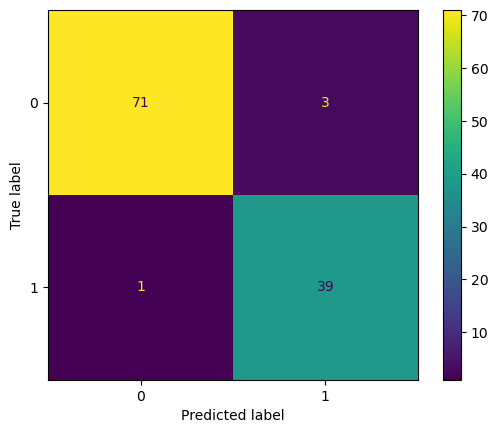

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test, test_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

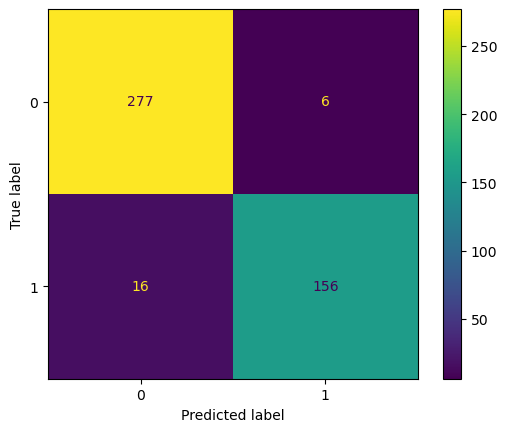

In [41]:
confusion_matrix = metrics.confusion_matrix(y_train, train_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predict))

              precision    recall  f1-score   support

           B       0.99      0.96      0.97        74
           M       0.93      0.97      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [43]:
print(classification_report(y_train, train_predict))

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       283
           M       0.96      0.91      0.93       172

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455



In [46]:
acc=[]
error=[]
for i in range(3,50,2):
    print(i)
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    test_predict=knn.predict(x_test)
    test_predict
    
    test_accuracy=accuracy_score(test_predict,y_test)
    print("test accuracy: ",test_accuracy)
    pd.crosstab(test_predict,y_test)
    test_error=np.mean(test_predict!=y_test)
    print("test error: ",test_error)
    #print(classification_report(test_predict,y_test))
    
    train_predict=knn.predict(x_train)
    train_error=np.mean(train_predict!=y_train)
    print("train error: ",train_error)
    train_accuracy=accuracy_score(train_predict,y_train)
    print("train accuracy: ",train_accuracy)
    
    acc.append([train_accuracy,test_accuracy])
    error.append([train_error,test_error])
    print("*"*20)



3
test accuracy:  0.9649122807017544
test error:  0.03508771929824561
train error:  0.04835164835164835
train accuracy:  0.9516483516483516
********************
5
test accuracy:  0.9824561403508771
test error:  0.017543859649122806
train error:  0.06593406593406594
train accuracy:  0.9340659340659341
********************
7
test accuracy:  0.9824561403508771
test error:  0.017543859649122806
train error:  0.07252747252747253
train accuracy:  0.9274725274725275
********************
9
test accuracy:  0.9824561403508771
test error:  0.017543859649122806
train error:  0.07032967032967033
train accuracy:  0.9296703296703297
********************
11
test accuracy:  0.9649122807017544
test error:  0.03508771929824561
train error:  0.07472527472527472
train accuracy:  0.9252747252747253
********************
13
test accuracy:  0.9824561403508771
test error:  0.017543859649122806
train error:  0.07692307692307693
train accuracy:  0.9230769230769231
********************
15
test accuracy:  0.9736842

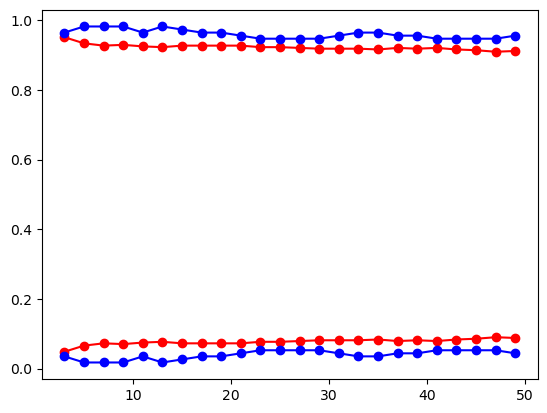

In [47]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

plt.plot(np.arange(3,50,2),[i[0] for i in error],"ro-")

plt.plot(np.arange(3,50,2),[i[1] for i in error],"bo-")

In [49]:
test_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
133,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.41070,0.22160,0.2060,0.07115
180,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.041070,0.1979,0.06013,...,14.44,28.36,92.15,638.4,0.1429,0.20420,0.13770,0.10800,0.2668,0.08174
360,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.090420,0.060220,0.1467,0.05177,...,24.22,26.17,161.70,1750.0,0.1228,0.23110,0.31580,0.14450,0.2238,0.07127
568,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,...,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666
251,15.66,23.20,110.20,773.5,0.11090,0.31140,0.317600,0.137700,0.2495,0.08104,...,19.85,31.64,143.70,1226.0,0.1504,0.51720,0.61810,0.24620,0.3277,0.10190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,11.34,21.26,72.48,396.5,0.08759,0.06575,0.051330,0.018990,0.1487,0.06529,...,13.01,29.15,83.99,518.1,0.1699,0.21960,0.31200,0.08278,0.2829,0.08832
553,11.75,17.56,75.89,422.9,0.10730,0.09713,0.052820,0.044400,0.1598,0.06677,...,13.50,27.98,88.52,552.3,0.1349,0.18540,0.13660,0.10100,0.2478,0.07757
499,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,0.06650,...,18.49,49.54,126.30,1035.0,0.1883,0.55640,0.57030,0.20140,0.3512,0.12040
281,11.26,19.83,71.30,388.1,0.08511,0.04413,0.005067,0.005664,0.1637,0.06343,...,11.93,26.43,76.38,435.9,0.1108,0.07723,0.02533,0.02832,0.2557,0.07613


In [65]:
new_data=test_x.iloc[2,:].values.tolist()

In [66]:
new_data

[20.48,
 21.46,
 132.5,
 1306.0,
 0.08355,
 0.08348,
 0.09042,
 0.06022,
 0.1467,
 0.05177,
 0.6874,
 1.041,
 5.144,
 83.5,
 0.007959,
 0.03133,
 0.04257,
 0.01671,
 0.01341,
 0.003933,
 24.22,
 26.17,
 161.7,
 1750.0,
 0.1228,
 0.2311,
 0.3158,
 0.1445,
 0.2238,
 0.07127]

In [67]:
new_df=pd.DataFrame([new_data])

In [68]:
new_df.columns=test_x.columns

In [69]:
new_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,20.48,21.46,132.5,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,24.22,26.17,161.7,1750.0,0.1228,0.2311,0.3158,0.1445,0.2238,0.07127


In [70]:
knn.predict(new_df)

array(['M'], dtype=object)

In [64]:
print(test_y)

133    M
180    B
360    M
568    M
251    M
      ..
353    B
553    B
499    M
281    B
389    B
Name: diagnosis, Length: 114, dtype: object


# A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.

In [4]:
animal_data=pd.read_csv("zoo.csv")

In [5]:
animal_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
animal_data.type.value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [7]:
new_data=animal_data.iloc[:,1:]

In [8]:
new_data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [9]:
x_train,x_test,y_train,y_test=train_test_split(animal_data.iloc[:,1:-1],animal_data.iloc[:,-1],test_size=0.2)

In [10]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
44,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0
30,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0


In [16]:
y_train.value_counts()

type
1    34
2    15
4    10
7     7
6     7
3     4
5     3
Name: count, dtype: int64

In [11]:
knn=KNeighborsClassifier(n_neighbors=3)

In [12]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
test_predict=knn.predict(x_test)

In [14]:
test_predict

array([1, 1, 7, 2, 5, 2, 1, 4, 4, 1, 1, 7, 2, 4, 1, 7, 1, 2, 6, 4, 2],
      dtype=int64)

In [35]:
pd.crosstab(test_predict,y_test)

type,1,2,3,4,5,6,7
row_0,,,,,,,
1,7,0,0,0,0,0,0
2,0,5,0,0,0,0,0
4,0,0,1,3,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0
7,0,0,0,0,0,0,3


In [36]:
test_accuracy=accuracy_score(test_predict,y_test)

In [37]:
test_accuracy

0.9523809523809523

In [38]:
train_predict=knn.predict(x_train)

In [39]:
train_accuracy=accuracy_score(train_predict,y_train)

In [40]:
train_accuracy

0.9875

In [32]:
new_data=pd.DataFrame([[0,1,0,0,1,1,0,1,0,1,0,0,2,1,0,1]],columns=x_test.columns)

In [33]:
prediction=knn.predict(new_data)

In [34]:
prediction[0]

2

In [ ]:
wasp	1	0	1	0	1	0	0	0	0	1	1	0	6	0	0	0	6

# A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.

In [41]:
glass=pd.read_csv("datasets/knn/glass.csv")

In [42]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7
